17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 23s 50ms/step - loss: 0.5689 - accuracy: 0.7182 - val_loss: 0.4426 - val_accuracy: 0.8224
Epoch 2/10
391/391 [==============================] - 16s 41ms/step - 

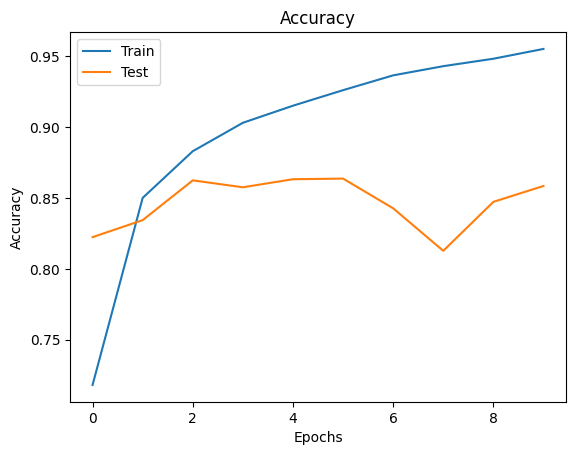

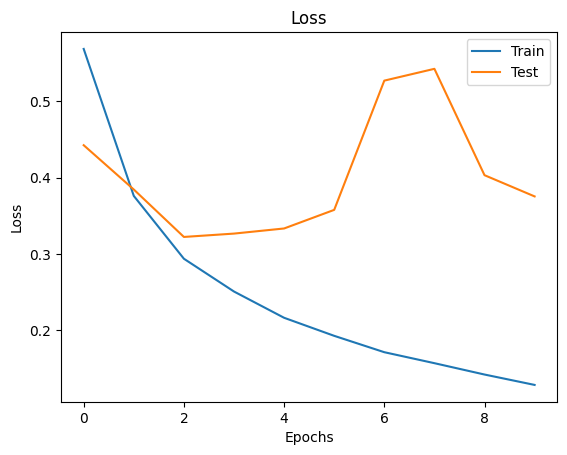

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# IMDB veri setini yükle
num_words = 15000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Dizileri sabit bir uzunluğa doldur
maxlen = 130
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Basit RNN modelini oluştur ve derle
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length=maxlen))
rnn.add(SimpleRNN(16, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

print(rnn.summary())

rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Modeli eğit
history = rnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)

# Modeli değerlendir
score = rnn.evaluate(x_test, y_test)
print("Accuracy:", score[1] * 100)

# Eğitim geçmişini çiz
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()